In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
import seaborn as sns
import statsmodels.graphics.gofplots as sm
import scipy.stats as sp
import pandas as pd
import math
import sklearn as skl
import random as rand
import time
import matplotlib.pyplot as plt
import statistics as stats

# Heights Experiment
To get a good grasp on fundamentals, we are going to be working with randomly generated population distributions so I can finally distinguish between the concepts of Sample Distribution, Sampling Distribution, and Population Distribution and finally understand Inferential Statistics

In [2]:
rand.seed(1623362164)
pop = [round(rand.gauss(63, 3), 1) for i in range(600)]
#outliers
pop.extend([round(rand.gauss(50, 0.8), 1) for i in range(20)])
pop.extend([round(rand.gauss(72, 0.4), 1) for i in range(10)])
pop.sort()

# Population Distribution
Basically, this is impossible to know in almost all practical cases. This is here to just get an overall idea of the population distribution for comparison with the sampling and sample distributions

(array([ 1.,  8., 10.,  2.,  0.,  0.,  0.,  3.,  1.,  1.,  7., 13., 20.,
        34., 30., 51., 52., 70., 70., 58., 62., 36., 30., 27., 17.,  8.,
         5.,  3.,  1., 10.]),
 array([48.5       , 49.29333333, 50.08666667, 50.88      , 51.67333333,
        52.46666667, 53.26      , 54.05333333, 54.84666667, 55.64      ,
        56.43333333, 57.22666667, 58.02      , 58.81333333, 59.60666667,
        60.4       , 61.19333333, 61.98666667, 62.78      , 63.57333333,
        64.36666667, 65.16      , 65.95333333, 66.74666667, 67.54      ,
        68.33333333, 69.12666667, 69.92      , 70.71333333, 71.50666667,
        72.3       ]),
 <BarContainer object of 30 artists>)

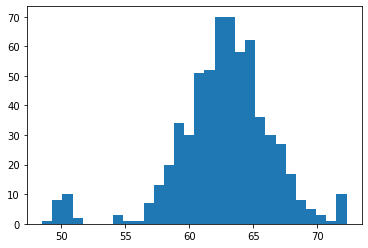

In [3]:
plt.hist(pop, bins=30)
# We see this population is roughly normal. In reality, it may very well not be,
# But that doesn't matter usually because of the Central Limit theorem applied to the Sampling Distribution
# Roughly speaking, say we have a single sample X drawn from this distribution. This means X can take on any
# value as drawn in this histogram, in roughly this frequency.

In [4]:
# Population Mean, standard deviation, variance
# Round to two decimals please
mu = round(stats.mean(pop), 2)
sigma_2 = round(stats.pvariance(pop), 2)
sigma = round(stats.pstdev(pop), 2)
print(mu, sigma, sigma_2)

62.68 3.79 14.4


# Sampling Distribution
This is the distribution of sample means. Basically, the random variable X_bar = (X_1 + X_2 + ... + X_N)/N
will take on a roughly normal distribution due to Central Limit Theorem. Basically all of inferential stats
depends on this distribution, and NOT the population distribution since we almost NEVER know the population
distribution

(array([  2.,  14.,  27.,  53., 107., 217., 318., 344., 452., 473., 410.,
        261., 144., 107.,  41.,  23.,   5.,   1.,   0.,   1.]),
 array([60.96 , 61.156, 61.352, 61.548, 61.744, 61.94 , 62.136, 62.332,
        62.528, 62.724, 62.92 , 63.116, 63.312, 63.508, 63.704, 63.9  ,
        64.096, 64.292, 64.488, 64.684, 64.88 ]),
 <BarContainer object of 20 artists>)

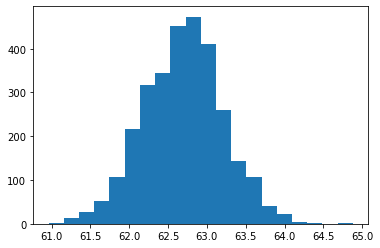

In [5]:
N = 50
sampling_dist = [round(stats.mean(rand.sample(pop, k=N)), 2) for i in range(3000)]
plt.hist(sampling_dist, bins=20)

(array([  1.,   0.,   3.,   8.,  14.,  41.,  80., 154., 263., 387., 498.,
        484., 459., 307., 191.,  85.,  17.,   5.,   1.,   2.]),
 array([58.12  , 58.5325, 58.945 , 59.3575, 59.77  , 60.1825, 60.595 ,
        61.0075, 61.42  , 61.8325, 62.245 , 62.6575, 63.07  , 63.4825,
        63.895 , 64.3075, 64.72  , 65.1325, 65.545 , 65.9575, 66.37  ]),
 <BarContainer object of 20 artists>)

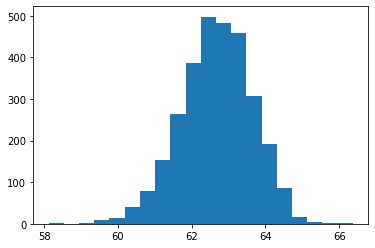

In [6]:
# A small sample from a normal distribution allows t-distribution to be applied
N_small = 15
sampling_dist = [round(stats.mean(rand.sample(pop, k=N_small)), 2) for i in range(3000)]
plt.hist(sampling_dist, bins=20)

# Sample Distribution
Now we're getting to the real statistics. Note: this is not the sampling distribution, as the sampling distribution is based on the mean of a sample for a certain number of samples N

In [7]:
# Get an SRS without replacement of the population
# This is used when you can't get any reads on population, otherwise, cluster or stratified sampling may be better
sample = rand.sample(pop, k=N)
small_sample = rand.sample(pop, k=N_small)

## Exploratory Statistics
Basically, we want to investigate our population distribution, but we only have the sample distribution.
Among the most important things we need to do is check visually/test for normality as that unlocks the 
powers of Gaussian/parametric statistics for us. If we are unable to assume normality, then we must turn
to nonparametric methods

Though most of this will be in the context of investigating normality, the visualizations are also
extraordinarily important for general data visualization

(array([ 3.,  0.,  1.,  4.,  8., 10., 12.,  8.,  4.]),
 array([49.9       , 52.06666667, 54.23333333, 56.4       , 58.56666667,
        60.73333333, 62.9       , 65.06666667, 67.23333333, 69.4       ]),
 <BarContainer object of 9 artists>)

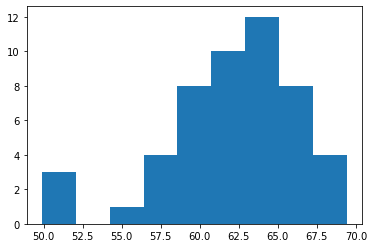

In [8]:
# Descriptive Statistics/Data Exploration
# At a minimum:
# Graph histogram, get 5-number summary, sample mean, stdev, and mode. Maybe do a box plot
# As we have here, we have an outlier in our sample. Perfect. But there is a roughly normal looking distribution sample
plt.hist(sample, bins=9)

In [9]:
def five_num_sum(sample):
    Q = np.percentile(sample, [25, 75])
    return [min(sample), Q[0], stats.median(sample), Q[1], max(sample)]

#five_num_sum(sample)
X_bar = round(stats.mean(sample), 2)
s = round(stats.stdev(sample), 2)

print(five_num_sum(sample), X_bar, s)

small_X_bar = round(stats.mean(small_sample), 2)
small_s = round(stats.stdev(small_sample), 2)

print(five_num_sum(small_sample), small_X_bar, small_s)


[49.9, 60.0, 62.65, 64.65, 69.4] 61.98 4.31
[49.8, 59.05, 62.1, 63.349999999999994, 68.1] 61.14 4.44


### Tests for Normality
There are two categories: visual and significance tests
Both are recommended to be done: visual is more ad-hoc but gives greater understanding,
significance testing is more rigorous.
This and most of what follows is according to the paper: 
Normality Tests for Statistical Analysis: A Guide for Non-Statisticians

First off, if we have N > 30 or 40, we have no fear of nonnormal population distributions, due to the CLT.
If you have hundreds of observations, then the population can basically be ignored. According to the CLT,
1. If you have a normal population, then samples will be normal
2. In large samples of 30-40, you have roughly normal data regardless of the population.
3. Means from any distribution are normal

#### Visual Methods

{'whiskers': [<matplotlib.lines.Line2D at 0x826d60ee20>,
 'caps': [<matplotlib.lines.Line2D at 0x826d61b520>,
 'boxes': [<matplotlib.lines.Line2D at 0x826d60eac0>],
 'medians': [<matplotlib.lines.Line2D at 0x826d61bbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x826d61bf40>],
 'means': []}

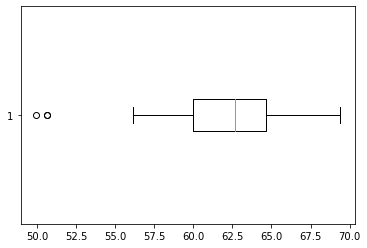

In [10]:
# Unreliable and doesn't guarantee normality, but can be quickly appreciated and understood by humans
# histograms, stem and leaf plot, boxplot, P-P plot, Q-Q plots are good for checking normality
# Scores greater than 1.5 times the interquartile range are out of the boxplot and are considered as outliers, 
# and those greater than 3 times the interquartile range are extreme outliers. A boxplot that is symmetric with 
# the median line at approximately the center of the box and with symmetric whiskers that are slightly longer 
# than the subsections of the center box suggests that the data may have come from a normal distribution
plt.boxplot(sample, vert=False)
# As we see here, we do have roughly normal data,but we have not only outliers, but extreme outliers
# This is a pretty poor sample, but thanks to the size, it is usable. For a small sample, outliers
# and extremes pretty much ruin data.

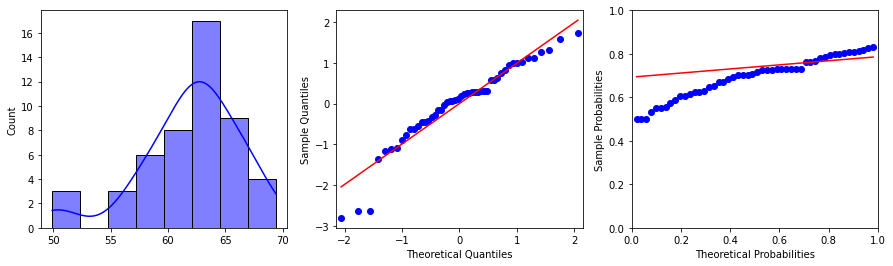

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(sample,kde=True, color ='blue',ax=ax[0])
# Need to normalize data as (x - X_bar) / s for QQ plot
normalized_sample = [(x - X_bar) / s for x in sample]
sm.ProbPlot(np.asarray(normalized_sample)).qqplot(line='s', ax=ax[1])
cumulative_prob = [norm.cdf(x) for x in normalized_sample]
sm.ProbPlot(np.asarray(cumulative_prob)).ppplot(line='s', ax=ax[2])
plt.show()
# We compare the QQ plot against the PP plot, and we can see a difference in how to interpret it.
# Perhaps the PP plot is more obvious as to whether or not something is normal, but the QQ plot
# appears more understandable. 

#### Normal Significance Tests


In [12]:
# Many tests exist: Kolmogorov-Smirnov (K-S) test, Lilliefors corrected K-S test, Shapiro-Wilk test, 
# Anderson-Darling test, Cramer-von Mises test, D’Agostino skewness test, Anscombe-Glynn kurtosis test, 
# D’Agostino-Pearson omnibus test, and the Jarque-Bera test 
# Shall compare K-S and Shapiro-Wilk as these two are the most popular, the former being the  most popular.
# It is recommended to use Shapiro-Wilk as K-S is frequently low in power even with the Lilliefors correction
# the K-S test uses the emperical cumulative distribution, and compares the difference between either the 
# actual cumulative distribution function, or another function's distribution function. It is a nonparametric
# test. But it is also low in power, so not recommended. 
# It is an exact test, so the number of samples does not matter to its validity. But it does have limitations:
# 1. only applies to continuous distribution, 2. more sensitive in center than tails, 3. most serious limitation:
# requires a fully specified distribution (like one we know or another eCDF), which means it is not estimable.
# The statistic is basically the maximum positive difference between each distribution. The KS is most commonly
# used for normality, but can apply to any continuous distribution that we know
# null hypothesis is that the data follow the given distibution. The alternative is not
sp.kstest(sample, lambda x: norm.cdf(x, loc=X_bar, scale=s))

KstestResult(statistic=0.11110600678630289, pvalue=0.5311817746087946)

In [13]:
# Shapiro-Wilk Test. It is biased by sample size, the larger it is, the more likely it will find a significant result.
# But it has more power than KS. It has some random formula, don't even worry about it because it's complicated and 
# we mostly monte carlo the distribution anyways.
# The H_0 is the data came from a normal distribution
sp.shapiro(sample)
# Iis correct, the distribution is not normal technically, so I'm rather impresssed

ShapiroResult(statistic=0.9310274720191956, pvalue=0.006044734735041857)

# Inferential Statistics
Now we'll be doing the real cool stuff

## Interval Estimation (for mean)
Confidence Intervals, do we have a value that makes sense here for the mean?
 The idea is that when you calculate a say 95% confidence interval, when you resample
 100 times and calculate these 95% confidence intervals, about 95 of the samples'
 Confidence intervals shall contain the population mean
 Typically, we want confidence of either 90%, 95%, 99%, or 99.9%, or critical value 
 alpha = 0.1. 0.05, 0.01, 0.001 respectively
 Now when estimating a point estimator interval that involves a sum like the mean,
 we can use the CLT to say that the distribution is normal and do all our Gaussian
 stuff. For N small, this assumption does not hold and we need to use the
 unique distribution obtained from summing together the samples or however they're 
 combined. Of course, that's a bit hard if you don't even know the population 
 distribution. But when you assume or know that the population distribution is normal,
 then we have a few things like Chi-squared distribution and the (Student's) t-distribution
 
 Now, the confidence interval we are working with is based on the distribution for
 the estimator, in this case the mean. Thus, with large N, we have a normal 
 distribution and it basically boils down to finding z-scores until 
 P(mu in [lower bound, higher bound]) >= 1 - alpha
 
 Note: the misunderstanding of confidence intervals is that there is a 95% chance the
 calculated interval contains the mean. This is INCORRECT. The 95% refers to the 
 reliability of repeated experimentation, that about 95% of our confidence intervals
 shall have the true mean somewhere. It is wholly possible for the mean to be completely
 out of the confidence interval, as once it is calculated, the mean is either inside or
 out, it is not a matter of probability. Said another way, each confidence interval is
 like a trial. By Law of Large Numbers, it trends towards containing the true mean
 95% percent of the time, but this is not the case for any individual trial.

In [14]:
alpha = 0.05
# X_bar ~ Normal(mu, sqrt(1/n)), so normalizing gets us (X_bar - mu)/(1/sqrt(n)) = sqrt(n) * (X_bar - mu) ~ N(0, 1)
# Now, you do Z-scores where the tails in total sum up to alpha, so each tail should contain alpha/2. From this
# we obtain the general formula: [X_bar - z_alpha/2 * sigma/sqrt(n), X_bar + z_alpha/2 * sigma/sqrt(n)].
# Of course, if we have the population stdev, this is easy, otherwise, replace sigma with sample stdev = s
# Here, we use s, as we usually don't know the stdev of all people's heights
# To obtain z_alpha/2, we have CDF^-1(1-alpha/2)
z = norm.ppf(1 - alpha / 2)
[X_bar - z * s / math.sqrt(N), X_bar + z * s / math.sqrt(N)]

[60.785350903410574, 63.17464909658942]

In [15]:
# For comparison, this is with the small sample, but this one will actually be incorrect way more often
# because it is too narrow at such a small N
[small_X_bar - z * small_s / math.sqrt(N_small), small_X_bar + z * small_s / math.sqrt(N_small)]

[58.893091270098175, 63.386908729901826]

In [16]:
# For N small, we must use Chi squared and t-distribution. These only apply for when
# the population distribution is about or is normal
# Now if your n is small, but you have the population stdev, you can use the above procedure. Else, use the t-distribution
# You have this pivot for the T-value: (X_bar - mu)/(s/sqrt(n)) ~ T(n - 1). You can then derive:
# mu in [X_bar - t_alpha/2,n-1 * s/sqrt(n), X_bar + t_alpha/2,n-1 * s/sqrt(n)]
T = t.ppf(1 - alpha / 2, N_small - 1)
[small_X_bar - T * small_s / math.sqrt(N_small), small_X_bar + T * small_s / math.sqrt(N_small)]

[58.68120995545299, 63.59879004454701]

In [17]:
# For N small, variance is in particular strange. At large N, since variance is also a sum
# the CLT applies, but because it's hard to find variance of variance, it's annoying to do Gaussian pivots,
# so it's best to resort to the Chi-squared distribution. When N is small, 
# variance is approximately the Chi Squared function. 
# If you don't know both mu and stdev of population, you must use this for interval estimation,
# but even if you knew mu, you'd still have to use this.
# You get the pivot: (n-1)s^2/stdev^2 which gives you the formula
# [(n-1)s^2/chi-squared_1 - alpha/2,n-1, (n-1)s^2/chi-squared_alpha/2,n-1] as a confidence interval for 
# variance
Y_upper = chi2.ppf(1 - alpha / 2, N_small - 1)
Y_lower = chi2.ppf(alpha/2, N_small - 1)
[(N_small-1) * small_s**2 / Y_upper, (N_small-1) * small_s**2 / Y_lower]

[10.566673647196849, 49.03247998707105]

## Null Hypothesis Significance Testing
Remember the null hypothesis is the one with the equality

While this focuses on significance of a statistic to the mean, we can also do either paired or between
individually random samples. For paired, its simple, you simply subtract values and use the variance of
the difference. For individually random samples, the test statistic is
(X_bar_1 - X_bar_2)/sqrt(s_1^2/n_1 + s_2^2/n_2). This is used in A/B testing. Two sample z-tests exist but
the stdev formula is super biased, so t-tests are almost exclusively used for two samples. Of course, you 
need data that is roughly normal, although I'm sure at high enough samples, the two sample t-test is still
valid. If you have more than 2 groups, ANOVA, Tukey-Kramer, ANOM, and Dunnett's test are all good options.

If you don't have normal data, or your sample size is too small to have normality tests conducted on it,
you may have to resort to nonparametric methods.

Since in practice, the stdev of the population is unknown, the statistic is only distributed according to the
t-distribution. The recommendation to use the normal on n > 30 only applied when it was difficult to perform 
t-tests by hand, but now, you should almost always use t-tests.

Other things you can do: given a sample proportion p_hat, you can do a Z-test on the statistic:
p_hat - p/ sqrt(p(1-p)/n). This is based on binomial distributions, so have np and n(1-p) > 10 respectively,
to be able to use the approximate normal distribution. Otherwise, this does not really apply. SRS sampling
is necessary, and it actually can't be more than 10% of the population size since that meses with independence
(apparently some more advanced methods exist for this however).

To use the T-distribution, on N >= 40, no assumptions need to be made about the population distribution.
On 15 < N < 40, sample should show no extreme values and little, if any, skewness; or you can assume the 
population distribution is normal. For N <= 15, sample should contain no outliers and no skewness, or assume
parent distribution is normal.

Standard errors: of a proportion p_hat, we have SE(p_hat) = sqrt(p_hat (1-p_hat)/n), of a mean, SE(X_bar) = s /sqrt(n)

### Fisherian P-Value Method
The idea here is to take your null hypothesis and see if you can reject it. When you take your test, you get to be able to say your results were statistically significant or not, but if it's not, you can't say that the null hypothesis is wrong, rather you don't have the evidence enough for it yet. This is arguably more used today, and is the p-value method in some people's textbooks. It can reject hypotheses by contradiction, but not prove/accept them without more evidence. H_0 is the hypothesis you wanna disprove. H_1 is your alternative hypothesis. In Fisher, you don't really need the alternative hypothesis or need to accept it, you can only say if you have a significant result or not. Usually, you say you fail to reject the null.

Of course in Significance testing, you choose a cutoff alpha level, but the P-value is the lowest alpha for which you can reject your null hypothesis

In [18]:
# One-sided test (lower tail)
# H_0: mu >= mu_0 (remember we want to reject this)
# H_1: mu < mu_0
# Of course use S if you don't know population stdev. Mu_0, your hypothesized
# value is always a given
# The test statistic is:
# W = (X_bar - mu_0) / (S/sqrt(n))
# for large N (CLT applies), use the acceptance region W >= z_alpha (opposite for other sided tail)
# Else, if you have a small N, and your population is normal, 
# do a t-test. (W <= t_alpha,n-1)
mu_0 = 62.68 # we have omniscience here, it's kinda a guess in real life
W = (X_bar - mu_0) / (s / math.sqrt(N)) 
p = norm.cdf(W)
print(p, alpha) # In this case, we do not have a significant result, we don't have the evidence to reject

0.12539486930124105 0.05


In [19]:
# Two-sided test
# H_0: mu = mu_0 (remember we want to reject this)
# H_1: mu != mu_0
W = (X_bar - mu_0) / (s / math.sqrt(N)) 
p = 2 * norm.cdf(-abs(W))
print(p, alpha) # Again failed to reject. This is a good sign, our sample mean is pretty close. 
# Under Fisherian assumptions however, this just means we can't say anything meaningful

0.2507897386024821 0.05


### Neyman-Pearson (traditional) method
In this case, when you reject your null hypothesis, you MUST accept the other hypothesis.
In most intro statistics classes, these are hybridized, and so you accept the other hypothesis
when the p-value rejects it, but this way is more clear. You choose your cutoff and then look at
whether or not the test statistic is in the acceptance region. In this paradigm, your null can
really be anything (it technically works in Fisher too, but you need to do a little math magic)

You basically use your alpha to obtain a value c, known as the critical value, and compare the
statistic to c. The picture is regions of acceptance and rejection, so ideally check yourself
as you do it.

In [20]:
# One-sided test
# H_0: mu >= mu_0 (remember we want to reject this)
# H_1: mu != mu_0
# Of course use S if you don't know population stdev. Mu_0, your hypothesized
# value is always a given
# The test statistic is:
# W = (X_bar - mu_0) / (S/sqrt(n))
# for large N (CLT applies), use the acceptance region W >= -z_alpha (opposite for other sided tail)
# Else, if you have a small N, and your population is normal, 
# do a t-test. (W <= t_alpha,n-1)
mu_0 = 62.68 # we have omniscience here, it's kinda a guess in real life
W = (X_bar - mu_0) / (s / math.sqrt(N))
c = norm.ppf(alpha)
print(W, c) # In this case, we do not have a significant result, so we accept the null. This makes sense,
# as the mean really IS 

-1.1484332873099428 -1.6448536269514729


In [21]:
# Two-sided test
# H_0: mu = mu_0 (remember we want to reject this)
# H_1: mu != mu_0
W = (X_bar - mu_0) / (s / math.sqrt(N)) 
c = norm.ppf(1 - alpha / 2)
print(abs(W), c) # Again we accept. Statistics is working!

1.1484332873099428 1.959963984540054


## Neyman-Pearson (Hypothesis Testing) vs. Fisher (Significance Testing)
This debate has not ever been settled and is why Statistics is so confusing. Basically, both 
methodologies should yield the same results, though extreme edge cases may differ. The idea
is that Fisher is more philosophically sound, while Neyman-Pearson is more mathematically
sound. Pick your poison, but Fisher is used more in science, especially, though p values
come with their misunderstandings and confusions.

### Power and P Values
Before we discuss P Value misunderstandings, we must talk about type I and type II errors and power.
A type I error is rejecting H_0 when it is true. Type II is accepting H_0 when it is false. If 
P(making type I error) <= alpha then we have a test of significance level alpha. We also have beta,
which is equal to P(making type II error). The Power of a test is defined as 1-beta. The power is 
equivalently the probability of getting a true positive result. Thus, we seek to maximize power.
In experiment design, power is usually made to be 80% or greater (so beta <= 20). Power analysis
is ideally done before experiementation, and can do things like getting the minimum sample number.
Power analysis basically gives you minimum numbers as in sample size, but it can do so in
significance level and power effect size as well. There is always a trade off between power
and alpha. Sample size can increase power with increasing size. Small effect size means less
power, bigger effect size means more power.
Minimum value of power is alpha. You basically have to choose a minimum beta to use to calculate
power. (manipulate the probability into a pivot, by subtracting and adding the true statistic, like mean,
and then assuming the alternative is true). It can be used to usually find the minimum sample number.
Note: this current setting is frequentist, but Bayesian may be more appropriate here.
 
Based on The Fickle P Value Generates Irreproducible Results:
A p value is not good enough alone for research. High enough power is arguably more important, as without
sufficient power, your p value is not useful enough. (you won't get a false positive, but you may get a 
false negative). In fact, unless power is high, the p-value itself fluctuates a lot.

'In the real world, the power of a study is not
known; at best it can be estimated.'

Power is a meausure of the repeatability of the p value, so 80% power means about 80% of the time it shall
be deemed significant.

In Fisher's original development of P-value analysis, his idea was that the lower the p value, the greater
reason to doubt the null. He in fact, wanted people to use the p value as a continuous variable to help
judgement (though not to determine it).

Even with 90% power, though, P-values vary by A LOT. Let's say you obtain a P-value of 0.03. A repeat could
give you p values anywhere between 0 and 0.6, and the chance of p < 0.05 is just 56%. This is argument 
against low power of 80% (which is standard due to our perception that false negative are much more
acceptable compared to false positive)

'Most scientific studies have much
less than 80% power, often around 50%
in psychological research and averaging 21% in neuroscience'

'We must consider alternative methods of
statistical interpretation that could be used.
Several options are available, and although
no one approach is perfect, perhaps the
most intuitive and tractable is to report
effect size estimates and their precision
(95% confidence intervals)'

'When interpreting data, many scientists
appreciate that an estimate of effect size is
relevant only within the context of a specific
study. We should take this further and not
only include effect sizes and their 95% CIs
in analyses but also focus our attention on
these values and discount the fickle P value.'

'Power analysis can be replaced with
‘planning for precision’, which calculates
the sample size required for estimating the
effect size to reach a defined degree of precision'

Also, if sample size grows too large, significance tests are likely to even detect tiny variations (overfitting?)

# Bivariate Data

## Exploratory Statistics
Graph with a scatterplot, effect is always on y, independent variable on x.  We measure effect/correlation with the Pearson's correlation coefficient or R for a population:
R = Cov(X, Y)/ (sigma_X * sigma_Y).
for a sample, it's basically this but times 1/ (n-1) to correct bias. Since correlation relies on mean and stdev,
it will fluctuate based on outliers.

The R^2 is the coefficient of determination is the percentage of variation in y that is explained by variation in x.
Must interpret R^2 in context of problem. Fo scientific experiments, R^2 of 90% or greater is standard. Observational
studies can be informative in the 10-20% range however.

Of course, the line of best fit is done by least squares, which can be extended for many nonlinear relationships that are
linear in the coefficients. Key thing is that the plot of residuals is normally distributed to have a good fit.

Clusters and outliers are important to note

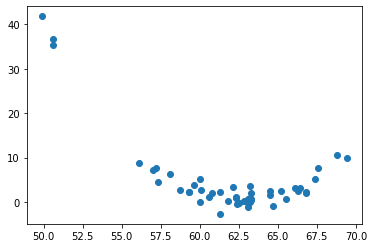

In [22]:
sample.sort()
effect = [(x - mu)**2/ 4 + rand.gauss(0, 1.5) for x in sample]
plt.scatter(sample, effect)

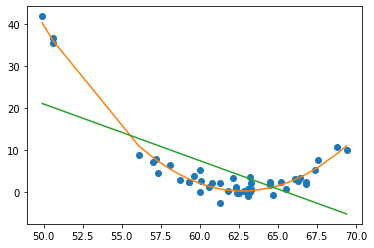

In [23]:
# In this case we don't have a linear relationship. It seems to be quadratic.
# We can however perform least squares to fit this: Ax = b => x=(A^T*A)^-1A^T * b
A = np.asmatrix([[x**2, x, 1] for x in sample])
b = np.asmatrix(effect)
b = np.reshape(b, (50, 1))
coeff = np.linalg.inv(A.T*A) * A.T * b
quad = [coeff[0].item()* x **2 + coeff[1].item() * x + coeff[2].item() for x in sample]
m, b = np.polyfit(sample, effect, 1)
lin = [m * x + b for x in sample]
plt.plot(sample, effect, 'o')
plt.plot(sample, quad)
plt.plot(sample, lin)

In [24]:
# Now for Pearson's R:
# Strictly speaking, Pearson only measures a linear relationship (why transformations are so important)
r = sp.pearsonr(sample, effect)[0]
print(r, r **2)
# The sample is poor mostly due to the nonlinearity. In a measurable sense, however, the R^2 is too low

-0.6497172829887213 0.4221325478142462


In [33]:
# Pearson's R also works in multiple linear regression, where we use x**2, x as explanatory variables . The R we get is the 
# coefficient of multiple correlation. In this case, we must find the R^2 first and square root it for R:
# R^2 = c.T * R_xx.inv * c, where c is the vector c = [r_x1y, r_x2y, ...].T, the correlations between predictors and predicted
# R_xx = the matrix of predictor correlations, [[rx1x1 rx1x2 ....], [rx2x1 rx2x2 ...] ...]
sq_sample = [x **2 for x in sample]
r_x2x = sp.pearsonr(sample, sq_sample)[0]
r_xx = sp.pearsonr(sample, sample)[0]
r_x2x2 = sp.pearsonr(sq_sample, sq_sample)[0]
R_xx = np.asmatrix([[r_x2x2, r_x2x],
                    [r_x2x, r_xx]])
r_x2y = sp.pearsonr(sq_sample, effect)[0]
r_xy = sp.pearsonr(sample, effect)[0]
c = np.asmatrix([r_x2y, r_xy]).T
R2 = c.T * np.linalg.inv(R_xx) * c
R = math.sqrt(R2)
print(R, R2)
# Unfortunately, overfitting is a problem. As more variables are added, R^2 grows. It is best to use the adjusted R^2.
# We can adjust though according to the formula: 1 - (1 - R^2) * (n - 1) / (n - p - 1) where p is the number of predictor
# variables, n being the number of samples. This is known as the Ezekiel adjustment. However this is a biased estimator.
R_adj2 = 1 - (1 - R2) * (N - 1) / (N - 2 - 1)
print(R_adj2)
# The better adjustment is known as the Olkin-Pratt estimator or an estimation of it, confirmed through emperical comparisons.

0.9866842299275755 [[0.97354577]]
[[0.97242006]]


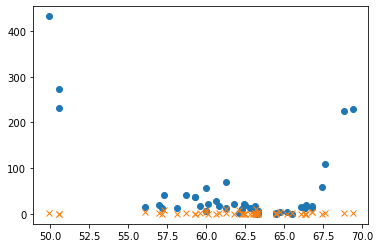

In [25]:
# Graph residuals
lin_res = [(lin[i] - effect[i])**2 for i in range(N)]
quad_res = [(quad[i] - effect[i])**2 for i in range(N)]
plt.plot(sample, lin_res, 'o')
plt.plot(sample, quad_res, 'x')
# residuals are always centered on 0 for a good model. For our purposes, we assume Gaussian distribution of those residuals
# which we can test via tests for normality, but in some cases, there may not be a normal distribution

In [27]:
# Confidence Intervals
# Now, we shall do confidence intervals with this graph. Officially, this test only works if you have a normally distributed,
# zero residual random sample with linear scatterplots. The confidence interval is for the true slope of the line. 
# The formula for the sample stdev  of the slope is sqrt(sum((y - y_hat)**2) / (n-2))/sqrt((sum(x-X_bar)**2)), 
# which is also the standard error. This test works for multivariate regression by giving a confidence interval for each 
# coefficient.
T_reg = t.ppf(1 - alpha / 2, N - 2)
s_b = math.sqrt(sum([(effect[i] - lin[i])**2 for i in range(N)])/ (N-2))
s_b = s_b / math.sqrt(sum([(x - X_bar)**2 for x in sample]))
[m - T_reg * s_b, m + T_reg * s_b]

[-1.8079473359046536, -0.891390334039581]

In [44]:
# For multivariate regression you compute CI for each coefficient. Here's how:
# e = the vector of residuals. We have the variance of the sample:
# e.T * e / (n - p) = var_hat
# Also for the least squares problem: X*beta = y, we obtain 
# C = var_hat * (X.T * X).inv
# To obtain confidence intervals then, we just do 
# beta_j +-t_alpha/2, n - p - 1 * sqrt(C_jj)
e = np.asmatrix([(effect[i] - quad[i]) for i in range(N)]).T
var_hat = (e.T * e / (N - 2))[0, 0]
C = var_hat * np.linalg.inv(A.T * A)
t_reg = t.ppf(1 - alpha/2, N - 2 - 1)
size_of_interval = np.asmatrix([t_reg * math.sqrt(C[i, i]) for i in range(3)]).T
print(coeff, size_of_interval) # +- size of interval for each row is the confidence intervals

[[ 2.42996034e-01]
 [-3.04919342e+01]
 [ 9.56756188e+02]] [[1.54546619e-02]
 [1.85605645e+00]
 [5.55619637e+01]]


When modeling, you can also find confidence intervals around a prediction, but this can be searched up.

In [ ]:
# Hypothesis testing: prediction, t-test for each coeff, f-tests?

In [ ]:
# Then talk about chi squared tests including the categorical tests, cohen's d, eta squared stuff in an effect size stuff

In [ ]:
# ANOVA stuff

In [ ]:
# then Power Analysis

In [11]:
#TODO:
# Regression significance testing (confidence intervals on slope and stuff) along with the quadratic and multivariate
# regression confidence intervals and significance tests
# Cohen's d, eta squared Chi-squared tests, regression stuff, look at Barron's. 
#
# Effect size, sample size, significance level, and power level are the four parts to doing statistics
# do a power analysis section

#TODO in other jupyter notebooks:
# Bayesian Statistics, Generalized Linear Model, Nonparametric Statistics and robust methods for modelling, 
# Causal Inference: https://www.ucbbiostat.com/
# Decision theory: https://data102.org/, game theory: https://bcourses.berkeley.edu/courses/1454200/assignments/syllabus, 
# Sampling + Large Sampling theory + Monte Carlo and stuff, theoretical statistics: STAT 210
# Experiment design: http://statweb.stanford.edu/~owen/courses/363/